<a href="https://colab.research.google.com/github/Khamdanfakhryza/Decoding-Machine-Learning-Intermediate/blob/main/Update_Submission_4_Klasifikasi_Gambar_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar Buah: Nanas, Jeruk, Stoberi, Pisang
- **Nama:** Khamdan Annas Fakhryza
- **Email:** khamdan@std.unissula.ac.id

**Impor Semua Paket/Library yang Digunakan**

In [1]:
!pip install --upgrade tensorflow
!pip install gdown

# Import library untuk memproses gambar
import cv2  # Library untuk pemrosesan gambar dan video
from PIL import Image  # Library untuk membuka, memanipulasi, dan menyimpan gambar
import skimage  # Library untuk pemrosesan gambar berbasis numpy
from skimage import io, img_as_ubyte  # Modul untuk membaca gambar dan konversi tipe data
from skimage.transform import resize, rotate, AffineTransform, warp  # Modul untuk transformasi gambar
from skimage.exposure import adjust_gamma  # Modul untuk menyesuaikan gamma pada gambar
from skimage.util import random_noise  # Modul untuk menambahkan noise acak ke gambar

# Import library untuk pemrosesan data
import numpy as np  # Library untuk operasi matematis dengan array multidimensi
import pandas as pd  # Library untuk analisis dan manipulasi data terstruktur
from tqdm.notebook import tqdm as tq  # Library untuk menampilkan progress bar dalam notebook

# Import library untuk model machine learning
import keras  # Library untuk membangun dan melatih model neural network
import tensorflow as tf  # Library untuk komputasi aljabar linear dan pembangunan model machine learning
from tensorflow.keras import Model, layers  # Modul untuk membuat model dan layer pada TensorFlow
from sklearn.model_selection import train_test_split  # Modul untuk membagi dataset menjadi training dan testing
from sklearn.metrics import confusion_matrix, classification_report  # Modul untuk evaluasi model klasifikasi
from tensorflow.keras.preprocessing import image  # Modul untuk preprocessing gambar sebelum digunakan dalam model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  # Modul untuk augmentasi dan konversi gambar
from tensorflow.keras.optimizers import Adam, RMSprop, SGD  # Optimizers yang umum digunakan dalam training model
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization  # Layer umum dalam model CNN
from tensorflow.keras.models import Sequential, Model  # Tipe model yang sering digunakan dalam Keras
from tensorflow.keras.applications import MobileNet  # Model pretrained MobileNet untuk transfer learning
from tensorflow.keras.applications.densenet import DenseNet121  # Model pretrained DenseNet121 untuk transfer learning
from tensorflow.keras.utils import to_categorical  # Fungsi untuk mengonversi label menjadi one-hot encoding
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau  # Callbacks untuk mengontrol training model

# Import library untuk memanipulasi file dan direktori
import os  # Library untuk operasi sistem seperti membaca dan menulis file
import shutil  # Library untuk mengelola file dan direktori
import zipfile  # Library untuk mengekstrak dan membuat file zip
from random import sample  # Fungsi untuk mengambil sampel acak dari sequence
from shutil import copyfile  # Fungsi untuk menyalin file
import pathlib  # Library untuk operasi path file
from pathlib import Path  # Kelas untuk mengelola path file secara lebih mudah

# Import library untuk visualisasi data
import matplotlib.pyplot as plt  # Library untuk membuat plot grafik
import seaborn as sns  # Library untuk membuat visualisasi statistik lebih menarik

# Library untuk memanipulasi data JSON
import json  # Library untuk memanipulasi data JSON

# Mengabaikan peringatan FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


**Mengunggah, Mengekstrak, dan Augmentasi Dataset Gambar**

In [2]:
import gdown
import zipfile
import os

# URL file Google Drive
file_id = '1Zwzbu3XnBT6VFa099W7_cmSwBvR5qJvr'
url = f'https://drive.google.com/uc?id={file_id}'

# Tentukan path untuk menyimpan file ZIP
zip_file_path = 'images.zip'

# Unduh file ZIP dari Google Drive
gdown.download(url, zip_file_path, quiet=False)

# Lokasi direktori tujuan untuk mengekstrak
extract_to = 'extracted_images'

# Membuat direktori tujuan jika belum ada
os.makedirs(extract_to, exist_ok=True)

Downloading...
From (original): https://drive.google.com/uc?id=1Zwzbu3XnBT6VFa099W7_cmSwBvR5qJvr
From (redirected): https://drive.google.com/uc?id=1Zwzbu3XnBT6VFa099W7_cmSwBvR5qJvr&confirm=t&uuid=ce829cfc-0919-4948-9720-46096da86a29
To: /content/images.zip
100%|██████████| 139M/139M [00:07<00:00, 19.1MB/s]


**mengekstrak file ZIP**

In [3]:
!ls
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/semangka/semangka (1505).jpeg  
  inflating: training_set/semangka/semangka (1506).jpeg  
  inflating: training_set/semangka/semangka (1507).jpeg  
  inflating: training_set/semangka/semangka (1508).jpeg  
  inflating: training_set/semangka/semangka (1509).jpeg  
  inflating: training_set/semangka/semangka (151).jpeg  
  inflating: training_set/semangka/semangka (1510).jpeg  
  inflating: training_set/semangka/semangka (1511).jpeg  
  inflating: training_set/semangka/semangka (1512).jpeg  
  inflating: training_set/semangka/semangka (1513).jpeg  
  inflating: training_set/semangka/semangka (1514).jpeg  
  inflating: training_set/semangka/semangka (1515).jpeg  
  inflating: training_set/semangka/semangka (1516).jpeg  
  inflating: training_set/semangka/semangka (1517).jpeg  
  inflating: training_set/semangka/semangka (1518).jpeg  
  inflating: training_set/semangka/semangka (1519).jpeg  
  inflating: training_

**Penggabungan Dataset Pelatihan dan Pengujian untuk Validasi Model**

In [4]:
# Direktori awal untuk train dan test
train_dir = "training_set"
test_dir = "test_set"
#test_dir = "test_set"

# Direktori baru untuk dataset gabungan
combined_dir = "validasi"

# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

**Menggabungkan Dataset Pelatihan dan Pengujian ke Direktori Validasi**

In [5]:
# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

**Visualisasi Acak Gambar dari Setiap Kelas pada Dataset Validasi dalam Skala Keabuan**

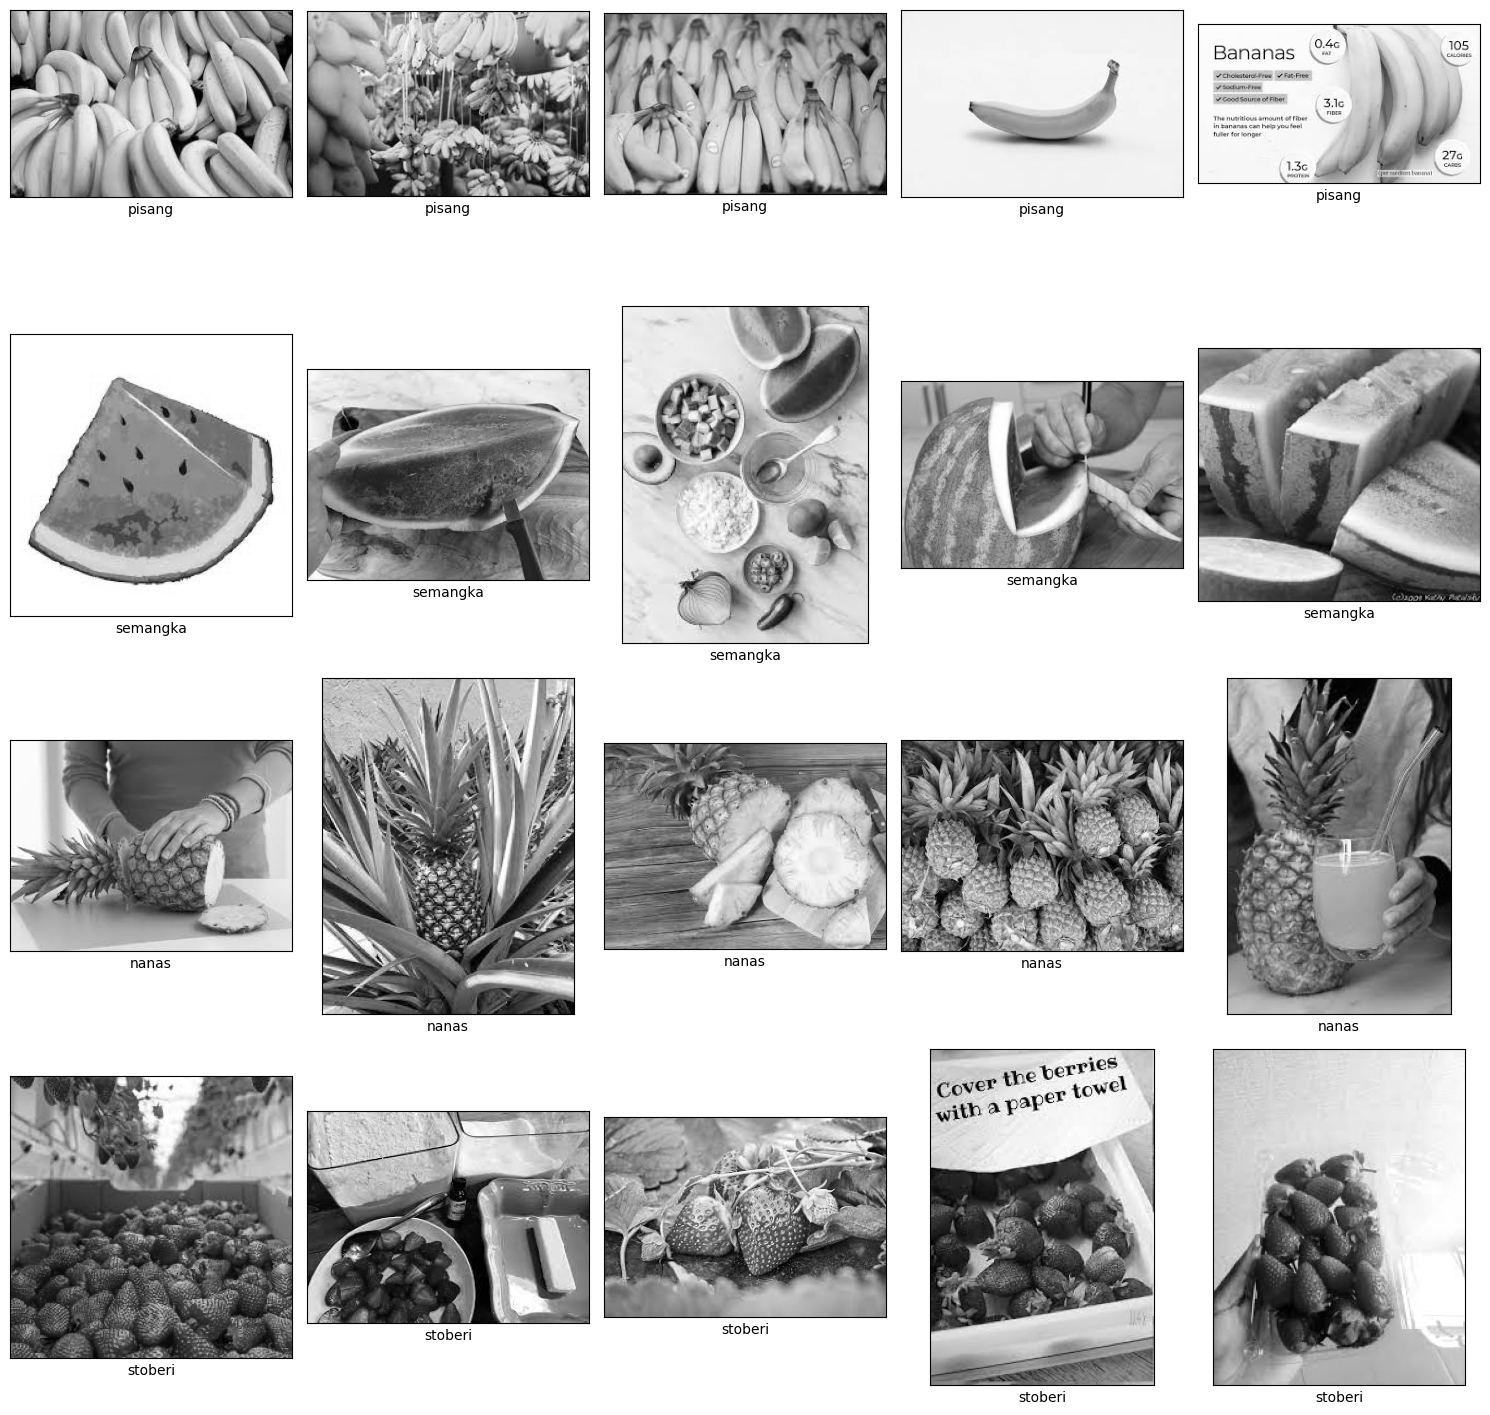

In [6]:
import matplotlib.pyplot as plt

# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
lung_image = {}

# Tentukan path sumber train
path = ""
path_sub = os.path.join(path, "validasi")
for i in os.listdir(path_sub):
    lung_image[i] = os.listdir(os.path.join(path_sub, i))

# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali kode ini dijalankan.
path_sub = "validasi"

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(lung_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
    images = np.random.choice(lung_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path).convert("L")  # Konversi menjadi skala keabuan
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()

**Analisis Distribusi Gambar di Setiap Kelas dalam Dataset Validasi dengan Visualisasi**

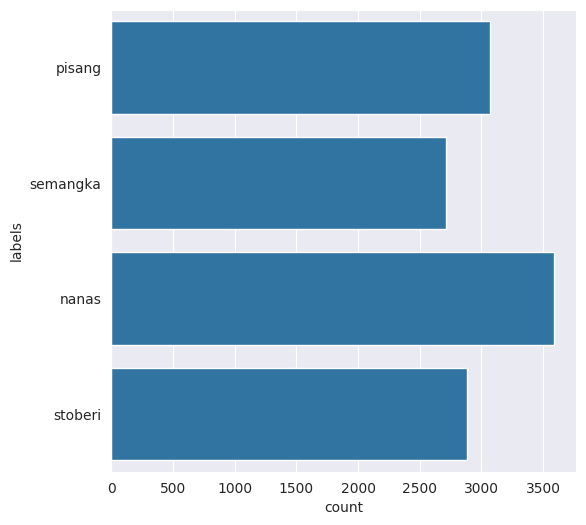

In [7]:
import seaborn as sns

# Definisikan path sumber
lung_path = "validasi"

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

**Menghitung Jumlah Gambar Pisang dan Stroberi dalam Dataset Pelatihan dan Pengujian**

In [8]:
train_pisang = os.path.join(train_dir + '/pisang')
train_stoberi = os.path.join(train_dir + '/stoberi')
train_nanas = os.path.join(train_dir + '/nanas')
train_semangka = os.path.join(train_dir + '/semangka')

test_pisang = os.path.join(test_dir + '/pisang')
test_stoberi = os.path.join(test_dir + '/stoberi')
test_nanas = os.path.join(test_dir + '/nanas')
test_semangka = os.path.join(test_dir + '/semangka')

# Menampilkan jumlah gambar di setiap kategori
print("Jumlah gambar pisang di set pelatihan: ", len(os.listdir(train_pisang)))
print("Jumlah gambar stoberi di set pelatihan: ", len(os.listdir(train_stoberi)))
print("Jumlah gambar nanas di set pelatihan: ", len(os.listdir(train_nanas)))
print("Jumlah gambar semangka di set pelatihan: ", len(os.listdir(train_semangka)))

print("Jumlah gambar pisang di set pengujian: ", len(os.listdir(test_pisang)))
print("Jumlah gambar stoberi di set pengujian: ", len(os.listdir(test_stoberi)))
print("Jumlah gambar nanas di set pengujian: ", len(os.listdir(test_nanas)))
print("Jumlah gambar semangka di set pengujian: ", len(os.listdir(test_semangka)))


Jumlah gambar pisang di set pelatihan:  2555
Jumlah gambar stoberi di set pelatihan:  2845
Jumlah gambar nanas di set pelatihan:  2990
Jumlah gambar semangka di set pelatihan:  2715
Jumlah gambar pisang di set pengujian:  511
Jumlah gambar stoberi di set pengujian:  569
Jumlah gambar nanas di set pengujian:  598
Jumlah gambar semangka di set pengujian:  543


**Augmentasi Gambar dengan ImageDataGenerator**

In [9]:
# Bersihkan sesi TensorFlow
tf.keras.backend.clear_session()

# Definisikan ImageDataGenerator untuk augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=50.0,
    validation_split=0.2  # Membagi data untuk validasi
)

**Augmentasi Data dan Pembangkitan Batch Gambar untuk Pelatihan Model dengan ImageDataGenerator**

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisi untuk ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,  # Menggunakan validation_split untuk membagi data menjadi 80% train dan 20% validation
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Memastikan split yang sama digunakan
)

# Definisi untuk train_generator dan validation_generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Mengubah dari 'binary' ke 'categorical'
    subset='training'  # Mengambil 80% data sebagai train set
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,  # Menggunakan direktori yang sama, namun membagi data menjadi validation
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Mengubah dari 'binary' ke 'categorical'
    subset='validation'  # Mengambil 20% data sebagai validation set
)


Found 8884 images belonging to 4 classes.
Found 2221 images belonging to 4 classes.


**Model Sequential, Conv2D, Pooling Layer**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the model
model = Sequential([
    Input(shape=(150, 150, 3)),  # Menambahkan lapisan Input
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Disesuaikan dengan jumlah kelas
])


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

**Callback**

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy')>0.96):
      print("Akurasi sudah tercapai (96%)")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# Callbacks
#callbacks = [
#    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
#    ModelCheckpoint('best_weights.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True) # Changed filename to best_weights.weights.h5
#]

In [ ]:
#model.compile(loss='binary_crossentropy',
#              optimizer=tf.optimizers.Adam(),
#              metrics=['accuracy'])

#class myCallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#    if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy')>0.96):
#      print("Akurasi sudah tercapai (96%)")
#      self.model.stop_training = True

#callbacks = myCallback()

**Latih**

In [15]:
# Train the model
num_epochs = 100
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=callbacks
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


348/348 - 601s - 2s/step - accuracy: 0.7335 - loss: 0.3040 - val_accuracy: 0.8188 - val_loss: 0.1951
Epoch 2/100
348/348 - 622s - 2s/step - accuracy: 0.8866 - loss: 0.1616 - val_accuracy: 0.9250 - val_loss: 0.0816
Epoch 3/100
348/348 - 621s - 2s/step - accuracy: 0.9317 - loss: 0.1015 - val_accuracy: 0.9125 - val_loss: 0.0947
Epoch 4/100
348/348 - 613s - 2s/step - accuracy: 0.9507 - loss: 0.0730 - val_accuracy: 0.9937 - val_loss: 0.0260
Epoch 5/100
Akurasi sudah tercapai (96%)
348/348 - 599s - 2s/step - accuracy: 0.9608 - loss: 0.0591 - val_accuracy: 0.9812 - val_loss: 0.0187


**performa model Anda selama pelatihan**

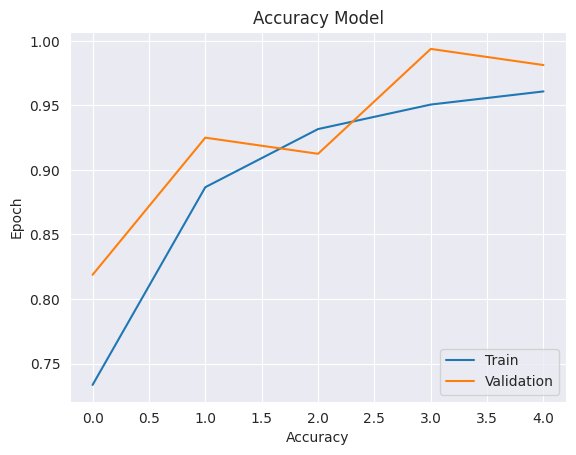

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Model")
plt.xlabel("Accuracy")
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'],loc='lower right')
plt.show()

**Visualisasi Kerugian Model selama Pelatihan**

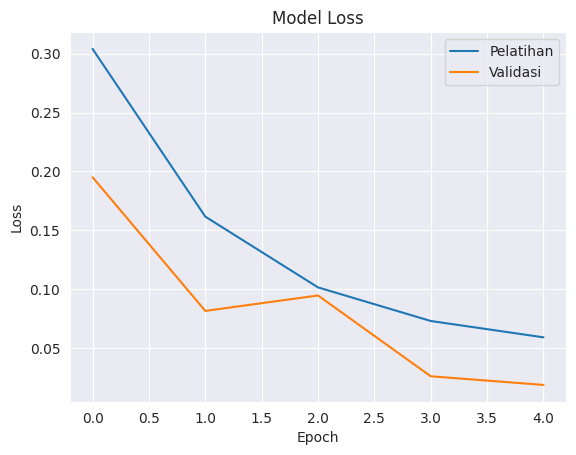

In [17]:
import matplotlib.pyplot as plt

# Plot loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Pelatihan', 'Validasi'], loc='upper right')
plt.show()


**Prediksi Kelas Gambar dengan Model dan Visualisasi Hasil**

Saving nanas (1610).jpeg to nanas (1610).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
nanas (1610).jpeg
nanas


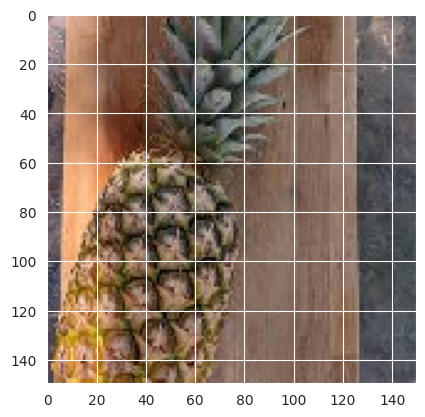

In [19]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np # Added import for numpy

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)


  print(fn)
  if classes[0,0]!=0:
    print('nanas')
  elif classes[0,1]!=0:
    print('semangka') # Added indentation
  elif classes[0,2]!=0:
    print('pisang')
  else:
    print('stoberi')

**Prediksi Kelas Gambar Menggunakan Model Klasifikasi dengan Visualisasi**

Saving stoberi (1058).jpeg to stoberi (1058).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
stoberi (1058).jpeg
stoberi


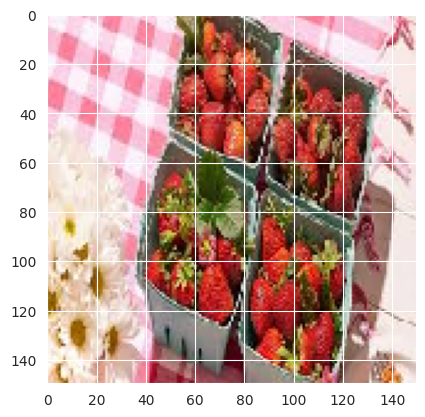

In [20]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np # Added import for numpy

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)


  print(fn)
  if classes[0,0]!=0:
    print('nanas')
  elif classes[0,1]!=0:
    print('Semangka') # Added indentation
  elif classes[0,2]!=0:
    print('pisang')
  else:
    print('stoberi')

Saving semangka (1261).jpeg to semangka (1261).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
semangka (1261).jpeg
Semangka


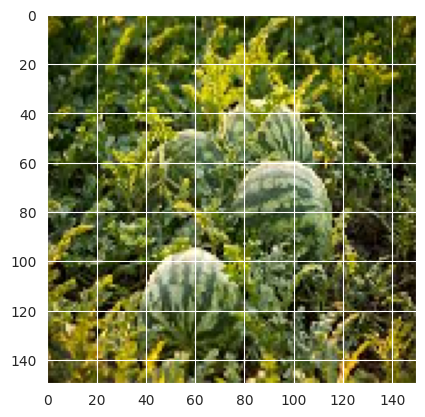

In [24]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np # Added import for numpy

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)


  print(fn)
  if classes[0,0]!=0:
    print('nanas')
  elif classes[0,1]!=0:
    print('Semangka') # Added indentation
  elif classes[0,2]!=0:
    print('pisang')
  else:
    print('stoberi')

**Menyimpan dan Mengonversi Model TensorFlow ke Format TensorFlow Lite**

In [28]:
import tensorflow as tf
import shutil
import numpy as np
from google.colab import files

# Define and compile a simple model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Save the model in Keras format
model.save('my_model.keras')  # Save in Keras format

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Use the saved Keras model
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Create a requirements.txt file
!pip freeze > requirements.txt

# Zip the TensorFlow Lite model and requirements file
shutil.make_archive('tflite_model_files', 'zip', '.', 'model.tflite')
shutil.make_archive('requirements', 'zip', '.', 'requirements.txt')

# Download the ZIP files
files.download('tflite_model_files.zip')
files.download('requirements.zip')

# Perform inference using the TensorFlow Lite model
def infer_with_tflite_model(model_path, input_data):
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    input_data = np.array(input_data, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Example input data (ensure it matches the model's input shape)
example_input_data = np.random.random((1, 28, 28)).tolist()  # Shape should match the model input
output = infer_with_tflite_model('model.tflite', example_input_data)
print("Inference Output:", output)


Saved artifact at '/tmp/tmpm93tgvyb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139150408816544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139150409048912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139150409042224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139150409054192: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Inference Output: [[-1.3876054   1.0107675  -0.5811893  -1.0695385   0.6225556   0.6369771
   0.26555794 -0.51562583 -0.8814222  -0.19942099]]


In [ ]:
import tensorflow as tf
import pathlib
import os

# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)


In [ ]:
model.save("model.h5")

In [ ]:
# Install tensorflowjs
!pip install tensorflowjs

# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model